# Pt.1. Constructing a NN

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

import numpy as np

In [63]:
# Defining a net using nn.Module
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.lin1 = nn.Linear(1, 25)
        self.lin2 = nn.Linear(25, 1)
    
    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.leaky_relu(self.lin2(x))
        return x
model_1 = Model()


# Defining a net using nn.Sequential and .add_module method
model_2 = nn.Sequential()
model_2.add_module('l1', nn.Linear(1, 25))
model_2.add_module('relu1', nn.ReLU())
model_2.add_module('l2', nn.Linear(25, 1))
model_2.add_module('relu2', nn.LeakyReLU())

# Defining a net using nn.Sequential as a list
model_3 = nn.Sequential(
    nn.Linear(1, 25),
    nn.ReLU(),
    nn.Linear(25, 1),
    nn.LeakyReLU()
)

# Defining a net using nn.Sequential from an OrderedDict
from collections import OrderedDict
model_3 = nn.Sequential(
    OrderedDict(
        [
            ('linear1', nn.Linear(1, 25)),
            ('relu1', nn.ReLU()),
            ('linear2', nn.Linear(25, 1)),
            ('relu2', nn.LeakyReLU())
        ]
    )
)

# Defining a net using nn.Sequential from an simple dict (trying). We're trying because since Python 3.7+ simple dict keeps the order of keys
# model_4 = nn.Sequential(
#     {'linear1': nn.Linear(100, 25),
#      'relu1': nn.ReLU(),
#      'linear2': nn.Linear(25, 128),
#      'relu2': nn.ReLU()}
# )
# PROVED IT CAN NOT

Хотя блин это круто, но я так только лосс и его производную смогу посчитать 

Хотя ...

# Pt. 2. Dataset setting up

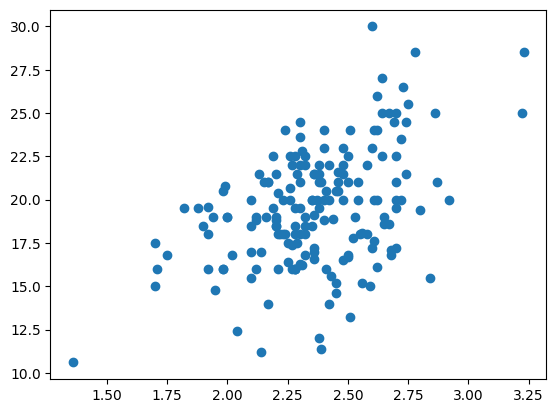

In [64]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
dataset = load_wine()
plt.scatter(dataset.data[:, 2], dataset.data[:, 3]);

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.data[:, 2], dataset.data[:, 3])

X_train_torch_compatible = torch.tensor(X_train, dtype=torch.float32)[:, None]
X_test_torch_compatible = torch.tensor(X_test, dtype=torch.float32)[:, None]
y_train_torch_compatible = torch.tensor(y_train, dtype=torch.float32)[:, None]
y_test_torch_compatible = torch.tensor(y_test, dtype=torch.float32)[:, None]

# Pt. 3. Calculating Loss

In [66]:
#MSE

y_pred = model_1(X_train_torch_compatible)

In [67]:
y_pred

tensor([[ 4.3059e-03],
        [-1.1339e-03],
        [-4.0517e-04],
        [ 9.2862e-03],
        [-1.8936e-04],
        [-1.0692e-03],
        [-1.5615e-04],
        [-2.7236e-04],
        [-5.7118e-04],
        [-3.3876e-04],
        [-6.5418e-04],
        [-6.3758e-04],
        [-8.7000e-04],
        [-8.7000e-04],
        [-8.7000e-04],
        [-3.3876e-04],
        [-2.8896e-04],
        [-5.2138e-04],
        [-5.3798e-04],
        [-4.0517e-04],
        [-3.8857e-04],
        [-5.3798e-04],
        [-1.0692e-03],
        [-7.0399e-04],
        [-6.0438e-04],
        [-1.0028e-03],
        [ 7.8022e-02],
        [-5.0478e-04],
        [-5.8778e-04],
        [-8.3680e-04],
        [-6.7438e-06],
        [-2.0596e-04],
        [-7.5379e-04],
        [-1.1858e-03],
        [-8.2019e-04],
        [-2.3916e-04],
        [-6.5418e-04],
        [ 1.5927e-02],
        [-1.4730e-03],
        [-6.7438e-06],
        [ 2.5887e-02],
        [-8.3680e-04],
        [-7.2059e-04],
        [-1

(array([118.,   6.,   3.,   1.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([-0.00199267,  0.00600877,  0.01401021,  0.02201165,  0.0300131 ,
         0.03801453,  0.04601598,  0.05401742,  0.06201886,  0.0700203 ,
         0.07802175]),
 <BarContainer object of 10 artists>)

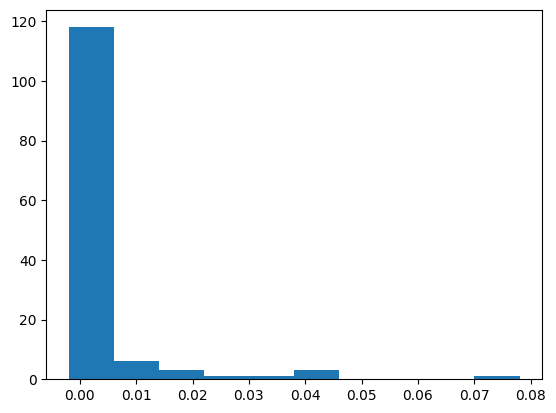

In [69]:
plt.hist(y_pred.detach().numpy())